In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи.
## Маркетинговая компания
Датасет содержит информацию связаную с кампаниями прямого маркетинга(телефонными звонками).
Задачей классификации для данного датасета является орпеделение будет ли клиентом открыт срочный депозит.

# 1. Загрузка данных.

In [3]:
dataset = "bank_customer_survey.csv"
data_raw = pd.read_csv(dataset)

In [4]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


Мы видим, что столбцы (признаки) имеют имена

* `age` - возраст
* `job` - область деятельности
* `marital` - семейное положение
* `education` - образование
* `default` - наличие неуплаты долга
* `balance` - баланс счета клиента
* `housing` - наличие ипотеки
* `loan` - наличие потребительского кредита
* `contact` - способ связи с клиентом(мобильный/домашний телефон)
* `day` - день последнего звонка
* `month` - месяц последнего звонка
* `duration` - продолжительность звонка
* `campaign` - количество звонков
* `pdays` - количество дней прошедших с последнего звонка
* `previous` - кол-во звонков до начала кампании
* `poutcome` - результат предыдущей маркетинговой компании
* `y` - откроет ли клиент быстрый депозит(целевой признак)

Признаки `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous` - количественные признаки.\
Признаки `job`, `marital`, `education`, `contact`, `month`, `poutcome` - номинальные(категориальные) признаки.\
Признаки `default`, `housing`, `loan`, `y` - бинарные признаки.

# 2. Вычисление основных характеристик.

Выведем основные метрические характеристики

* `count` - число значений
* `mean` - среднее арифметическое
* `std` - разброс
* `min` - минимальное значение
* `max` - максимальное значение

In [5]:
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Вычислим и выведем матрицу корреляции, чтобы определить возможные связи между признаками

In [6]:
corr_mat = data_raw.corr()
corr_mat

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


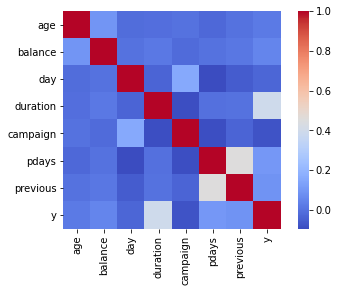

In [7]:
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Из полученных данных видим, что признаки не коррелируют между собой.

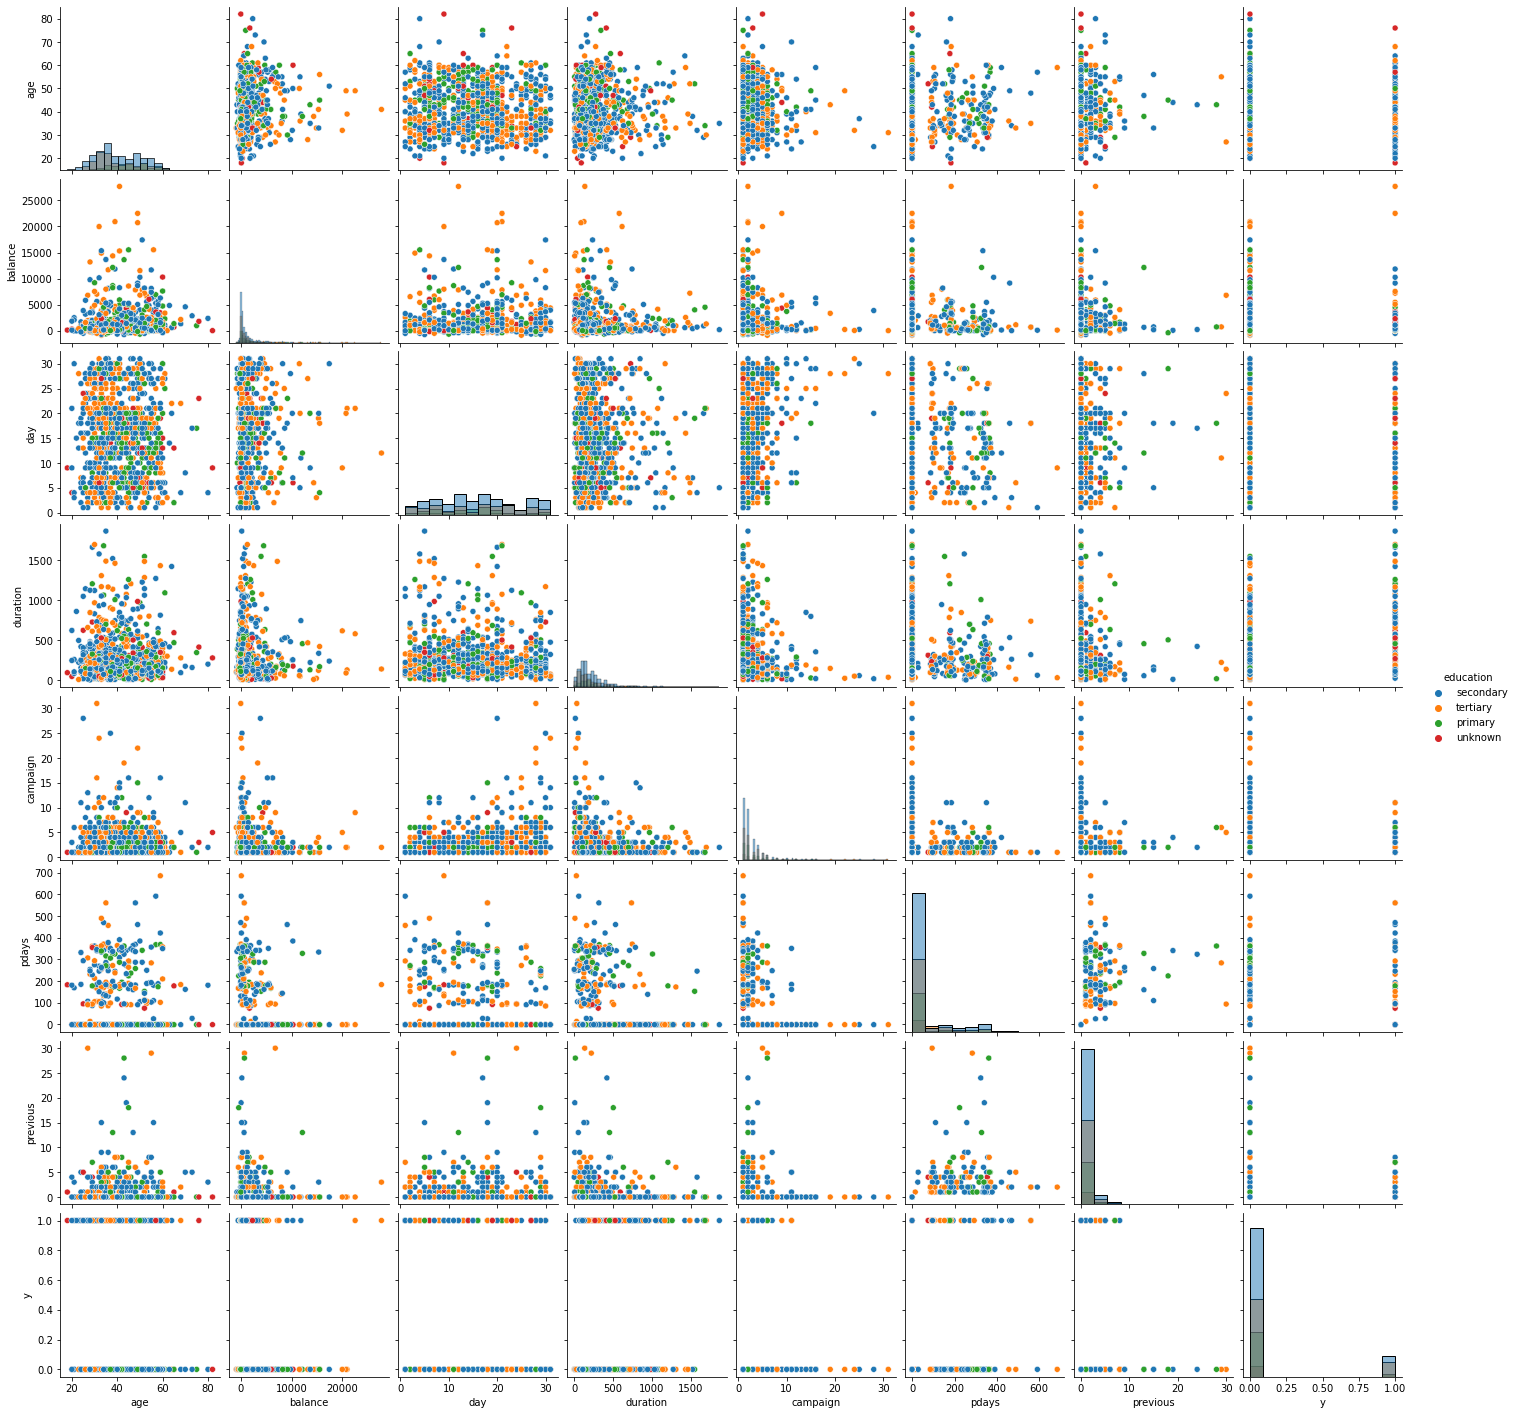

In [8]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue="education", diag_kind="hist")
pass

# 3. Обработка пропущенных значений.

In [9]:
data_raw.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Пропущенных значений нет.

# 4. Обработка категориальных признаков

Обработаем категориальные признаки заменив тип с `object` на `category`. А затем каждую категорию заменим на бинарные признаки.

In [10]:
data_raw["job"] = data_raw["job"].astype("category")
data_raw["job"].dtype

CategoricalDtype(categories=['admin', 'blue', 'entrepreneur', 'housemaid', 'management',
                  'retired', 'self', 'services', 'student', 'technician',
                  'unemployed', 'unknown'],
, ordered=False)

In [11]:
data_raw["marital"] = data_raw["marital"].astype("category")
data_raw["marital"].dtype

CategoricalDtype(categories=['divorced', 'married', 'single'], ordered=False)

In [13]:
data_raw["education"] = data_raw["education"].astype("category")
data_raw["education"].dtype

CategoricalDtype(categories=['primary', 'secondary', 'tertiary', 'unknown'], ordered=False)

In [14]:
data_raw["contact"] = data_raw["contact"].astype("category")
data_raw["contact"].dtype

CategoricalDtype(categories=['cellular', 'telephone', 'unknown'], ordered=False)

In [15]:
data_raw["month"] = data_raw["month"].astype("category")
data_raw["month"].dtype

CategoricalDtype(categories=['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
                  'may', 'nov', 'oct', 'sep'],
, ordered=False)

In [16]:
data_raw["poutcome"] = data_raw["poutcome"].astype("category")
data_raw["poutcome"].dtype

CategoricalDtype(categories=['failure', 'other', 'success', 'unknown'], ordered=False)

In [17]:
data_raw.describe(include=["category"])

,job,marital,education,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211
unique,12,3,4,3,12,4
top,blue,married,secondary,cellular,may,unknown
freq,9732,27214,23202,29285,13766,36959


In [18]:
data = pd.get_dummies(data_raw)

# 5. Нормализация

Произведем нормализация для всех числовых признаков.

In [19]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin,job_blue,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.493547,0.052494,0.028449,0.047245,0.002110,0.116985,0.114375,0.215257,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,0.137906,0.027643,0.277416,0.052364,0.049968,0.114827,0.008376,0.321406,0.318269,0.411005,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085768,0.666667,0.064864,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Классификация

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop(["y"], 1)
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5726)

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9127282557939492, Test: 0.8925254312251216'

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9021848656885153, Test: 0.8892083149049094'

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9005136523384698, Test: 0.8898717381689518'

# 7. Вывод

* При увеличение числа соседей в алгоритме ближайших соседей растет и точность, следовательно можно подобрать такое значение при котором достигнится максимальная точность.
* Алгоритм показывает достаточно высокие точности, что по моему предположению связанно с несбалансированностью классов.